In [86]:
#Import libraries 
import numpy as np
import pandas as pd
from IPython.display import display 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.feature_selection import ExhaustiveFeatureSelector as efs
Df = pd.read_csv('C:/Users/user/Desktop/WorkAssign/PreScreen_r3/palm_ffb.csv')

In [87]:
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [88]:
#view first 5 rows
Df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [89]:
#Size of the panda table
Df.shape

(130, 9)

In [90]:
#view last 5 rows
Df.tail()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
125,01.06.2018,498.2,27.213333,21.6,33.6,165.6,24,820758.9147,1.29
126,01.07.2018,494.7,27.074194,21.2,33.5,154.7,26,882254.2254,1.42
127,01.08.2018,478.8,27.016129,20.4,33.6,127.2,25,829488.8199,1.61
128,01.09.2018,481.1,26.946667,21.0,34.2,180.6,23,792101.0471,1.91
129,01.10.2018,510.8,26.819355,21.0,34.4,207.0,26,771805.3922,2.04


In [91]:
#Identify null value
Df.isnull().any()

Date             False
SoilMoisture     False
Average_Temp     False
Min_Temp         False
Max_Temp         False
Precipitation    False
Working_days     False
HA_Harvested     False
FFB_Yield        False
dtype: bool

In [92]:
Df.describe() #Summary Statistic of the palm data

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


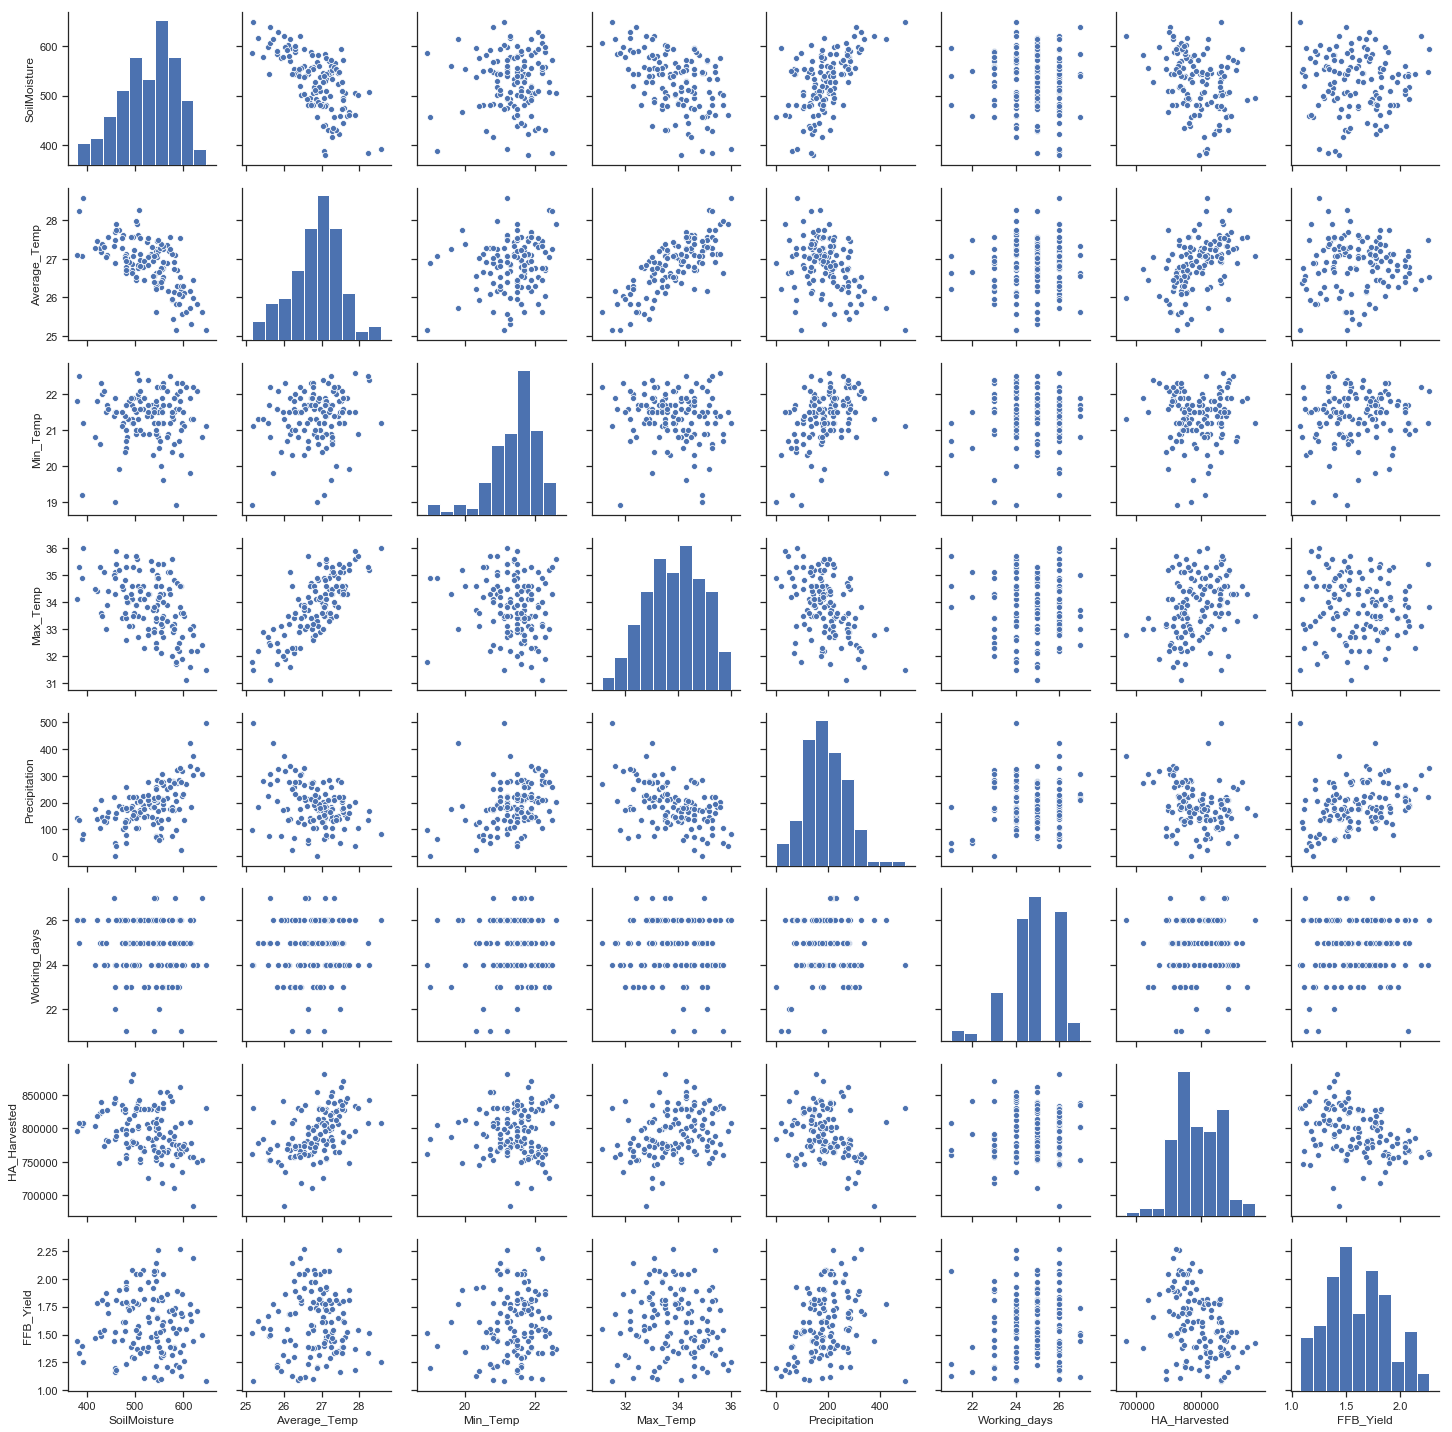

In [93]:
#view teh variables relationship using pairplot
sns.pairplot(Df)
plt.show()

A positive linear relationship can be observed between FFB Yield and Precipitation feature. As one increases so does the other. On the other hand, FFB yield and HA_Harvested exhibit negative linear relationship. As one increases, and another one decreases.

Text(0.5, 1.0, 'Correlation matrix')

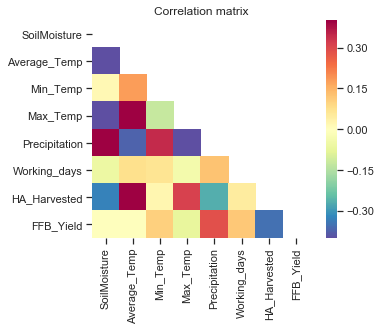

In [94]:
#view the variables relationship in heatmap
corrs = Df.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

In [95]:
# Convert the Data into a correlation matrix
Df.corr().round(2) 

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.00,-0.65,0.02,-0.50,0.55,-0.06,-0.33,-0.00
Average_Temp,-0.65,1.00,0.18,0.76,-0.37,0.08,0.45,-0.01
Min_Temp,0.02,0.18,1.00,-0.12,0.35,0.07,0.02,0.10
Max_Temp,-0.50,0.76,-0.12,1.00,-0.46,-0.04,0.31,-0.07
Precipitation,0.55,-0.37,0.35,-0.46,1.00,0.13,-0.27,0.29
Working_days,-0.06,0.08,0.07,-0.04,0.13,1.00,0.05,0.12
HA_Harvested,-0.33,0.45,0.02,0.31,-0.27,0.05,1.00,-0.35
FFB_Yield,-0.00,-0.01,0.10,-0.07,0.29,0.12,-0.35,1.00


• Warm colors (red) in heatmap indicate a positive correlation, cool colors (blue) indicate a negative correlation.

• FFB_Yield has strong negative correlation with HA_Harvested

• FFB_Yield has strong positive correlation with Precipitation

• FFB_Yield has strong moderate correlation with Working days

• FFB_Yield has weaker positive correlation with Max_Temp and Min_Temp

In [96]:
import pingouin as pg
corr = pg.pairwise_corr(Df, columns=[['FFB_Yield'], ['SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp', 'Precipitation','Working_days','HA_Harvested']], method='spearman')
corr.sort_values(by=['p-unc'])[['X', 'Y', 'n', 'r', 'p-unc']].head()

,X,Y,n,r,p-unc
6,FFB_Yield,HA_Harvested,130,-0.386,0.000006
4,FFB_Yield,Precipitation,130,0.312,0.000303
3,FFB_Yield,Max_Temp,130,-0.111,0.210631
5,FFB_Yield,Working_days,130,0.100,0.259521
2,FFB_Yield,Min_Temp,130,0.084,0.340372


Form this pairwise correlation, one-vs-all correlation has been used to study all external factors correlation against FFB_yield. The general rule is that you can reject the hypothesis that the two variables are not correlated if the p-value is below 0.05, which is the case. We can therefore say that Precipitation and HA_harvested are highly correlated  against FFB_yield.

# Using Exhaustive Feature Selector to select the best all possible feature combinations

In [97]:
X = Df.drop(['FFB_Yield','Date'],axis=1)  #independent columns
y = Df.FFB_Yield    #target column i.e FFB_Yield

In [98]:

emodel=efs(RandomForestRegressor(),min_features=1,max_features=7,scoring='r2',n_jobs=-1)

emodel.fit(X,y)

Features: 127/127

ExhaustiveFeatureSelector(clone_estimator=True, cv=5,
                          estimator=RandomForestRegressor(bootstrap=True,
                                                          criterion='mse',
                                                          max_depth=None,
                                                          max_features='auto',
                                                          max_leaf_nodes=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
                                                          min_weight_fraction_leaf=0.0,
                                                          n_estimators='warn',
                                                          n_jobs=None,
  

In [99]:
emodel.best_idx_


(0, 2, 3, 4, 6)

In [100]:
X.columns[list(emodel.best_idx_)]

Index(['SoilMoisture', 'Min_Temp', 'Max_Temp', 'Precipitation',
       'HA_Harvested'],
      dtype='object')

In [102]:
printmd("**_SoilMoisture, Min_Temp, Precipitation and A_Harvested are the factors that influencing the FFB_Yield_**", color="red")

<span style='color:red'>**_SoilMoisture, Min_Temp, Precipitation and A_Harvested are the factors that influencing the FFB_Yield_**</span>